# Import Module

In [ ]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")

# Load Dataset

In [ ]:
"""
Source: https://archive.ics.uci.edu/dataset/477/real+estate+valuation+data+set
"""

df = pd.read_csv("real_estate_taiwan.csv")
# df.columns
#Check the parts of the data set that we will need
df.dropna(axis=0, inplace=True)                 # Discard rows with missing values
# df[['X2 house age','X3 distance to the nearest MRT station','Y house price of unit area']].head(21)
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


# Extract Chosen Features and Target

Shape of the Data Containing the Features: (414, 2)
Shape of the data for the Target: (414, 1)


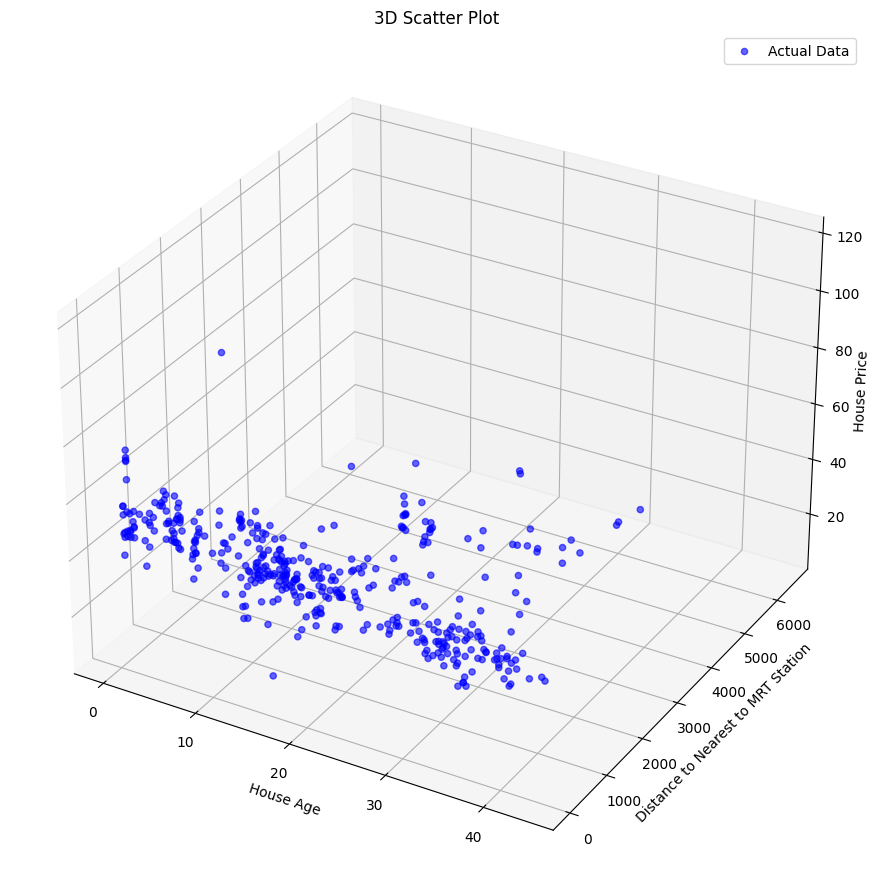

In [ ]:
# “House Age” and “Distance to nearest MRT station” features
# For y, take 'House Price'

X = df.iloc[:,2:4].to_numpy()
y = df.iloc[:,-1].to_numpy().reshape(-1,1)

#alternatively since we only have two features
# X = df[["X2 house age","X3 distance to the nearest MRT station"]].to_numpy()
# y = df["Y house price of unit area"].to_numpy().reshape(-1,1)

print(f"Shape of the Data Containing the Features: {X.shape}")
print(f"Shape of the data for the Target: {y.shape}")
fig = plt.figure(figsize=(11,15))
ax = fig.add_subplot(111, projection='3d')
ax.scatter3D(X[:,0],X[:,1],y, color='blue', alpha=0.6,label="Actual Data")
ax.set_xlabel("House Age")
ax.set_ylabel("Distance to Nearest to MRT Station")
ax.set_zlabel("House Price")
ax.set_title("3D Scatter Plot")
ax.zaxis.labelpad = -0.3
plt.legend()
plt.show()


# Split Data into Training and Testing

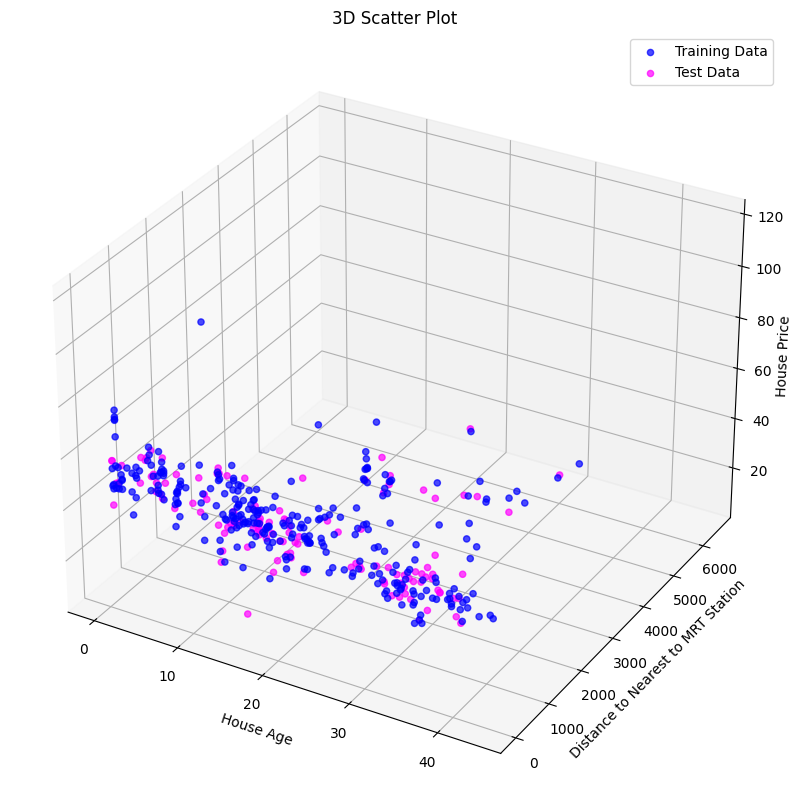

In [ ]:
#Split Data into Training and Testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

##Plot Training data and Test Data
fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter3D(X_train[:,0],X_train[:,1],y_train, color='blue', alpha=0.7,label="Training Data")
ax.scatter3D(X_test[:,0],X_test[:,1],y_test, color='magenta', alpha=0.7,label="Test Data")
ax.set_xlabel("House Age")
ax.set_ylabel("Distance to Nearest to MRT Station")
ax.set_zlabel("House Price")
ax.zaxis.labelpad = -0.4
ax.set_title("3D Scatter Plot")
plt.legend()
plt.show()

# Normalize the Data

In [ ]:
#Normalize the Data
scalerX = StandardScaler()
X_train_scaled = scalerX.fit_transform(X_train)
X_test_scaled = scalerX.transform(X_test)

scalerY = StandardScaler()
y_train_scaled = scalerY.fit_transform(y_train)
y_test_scaled = scalerY.transform(y_test)

# Linear Regression via Gradient Descent

In [ ]:
def gradient_descent(X, y_true, epochs, eta = 0.01):
    """
    Perform Gradient Descent
    """
     #Initialize Weights and biases
    w = np.random.randn(X.shape[1]).reshape(-1, 1)
    b = 0
    N = X.shape[0] # Number of Samples in the Dataset

    cost_list = []
    epoch_list = []

    for i in range(epochs):
        #Forward Pass
        y_pred = X @ w + b

        #Calcate the Gradients with respect to w and b
        # gradw = -(2/N)*(np.dot(X.transpose(),(y_true-y_pred)))
        gradw = (-(2/N)*((y_true-y_pred).transpose() @ X)).reshape(-1,1)
        gradb = -(2/N)*np.sum(y_true-y_pred)

        #Solve for optimal w and b via gradient descent update
        w = w - eta * gradw
        b = b - eta * gradb

        cost = np.mean(np.power((y_true-y_pred),2)) # MSE (Mean Squared Error)


        #Stopping Criteria
        if np.linalg.norm(gradw) <= 1e-20 and np.linalg.norm(gradb) <= 1e-20:
            break;


        if i%100==0:
            cost_list.append(cost)
            epoch_list.append(i)

    return w, b, cost, cost_list, epoch_list

In [ ]:
w = np.random.randn(X.shape[1]).reshape(-1, 1)
b = 0
N = X.shape[0] # Number of Samples in the Dataset

y_pred = X @ w + b
# print(y_pred.shape == y.shape)
# print((y_pred - y).T @ X)
# print("==="*100)
# print(X.T @ (y_pred - y))
# print("==="*100)
# print(np.dot(X.transpose(),(y_pred-y)))

w - ((y_pred - y).T @ X).reshape(-1,1)

array([[-2.17988633e+06],
       [-3.29056912e+08]])

# Linear Regression via Stochastic Gradient Descent

In [ ]:
def sgd(X, y, epochs, eta = 0.05):
    """
    Perform Stochastic Gradient Descent
    """

    #Initialize Weights and biases
    w = np.random.randn(X.shape[1]).reshape(-1,1)
    b = 0
    N = X.shape[0] # Number of Samples in the Dataset

    cost_list = []
    epoch_list = []

    for i in range(epochs):

        #Randomly select a datapoint
        idx = random.randint(0,N-1)
        randx = X[idx].reshape(1,-1)
        randy = y[idx] ##True value of y

        #Forward Pass
        y_pred = randx @ w + b

        #Calculate gradients wrt to w and b
        # gradw = -(2/N)*(randx.T.dot(randy-y_pred))
        gradw = -(2/N)*(np.dot(randx.T, (randy-y_pred)))
        gradb = -(2/N)*(randy-y_pred)

        #Solve for optimal w and b via SGD
        w = w - eta * gradw
        b = b - eta * gradb

        cost = np.power((randy-y_pred),2)

        #Stopping Criteria
        if np.linalg.norm(gradw) <= 1e-20 and np.linalg.norm(gradb) <= 1e-20:
            break;

        if i%100==0: # at every 100th iteration record the cost and epoch value
            cost_list.append(cost)
            epoch_list.append(i)

    return w, b, cost, cost_list, epoch_list

In [ ]:
idx = random.randint(0,N-1)
randx = X[idx].reshape(1,-1)


X[idx]

array([  10.4  , 2251.938])

# Train the model GD vs SGD

In [ ]:
np.random.seed(0)
w, b, cost, cost_list, epoch_list = gradient_descent(X_train_scaled, y_train_scaled, 10000)
w_sgd, b_sgd, cost_sgd, cost_list_sgd, epoch_list_sgd = sgd(X_train_scaled,y_train_scaled,10000)


print(f"Gradient Descent ==> Weights: {w}, \n bias: {b}")
print("====" * 100)
print(f"Stochastic Gradient Descent ==> Weights: {w_sgd}, \n bias: {b_sgd}")



Gradient Descent ==> Weights: [[-0.21158342]
 [-0.66524663]], 
 bias: 4.372050587769554e-16
Stochastic Gradient Descent ==> Weights: [[-0.18954948]
 [-0.57367357]], 
 bias: [[0.0022148]]


# Surface Plot via Gradient Descent

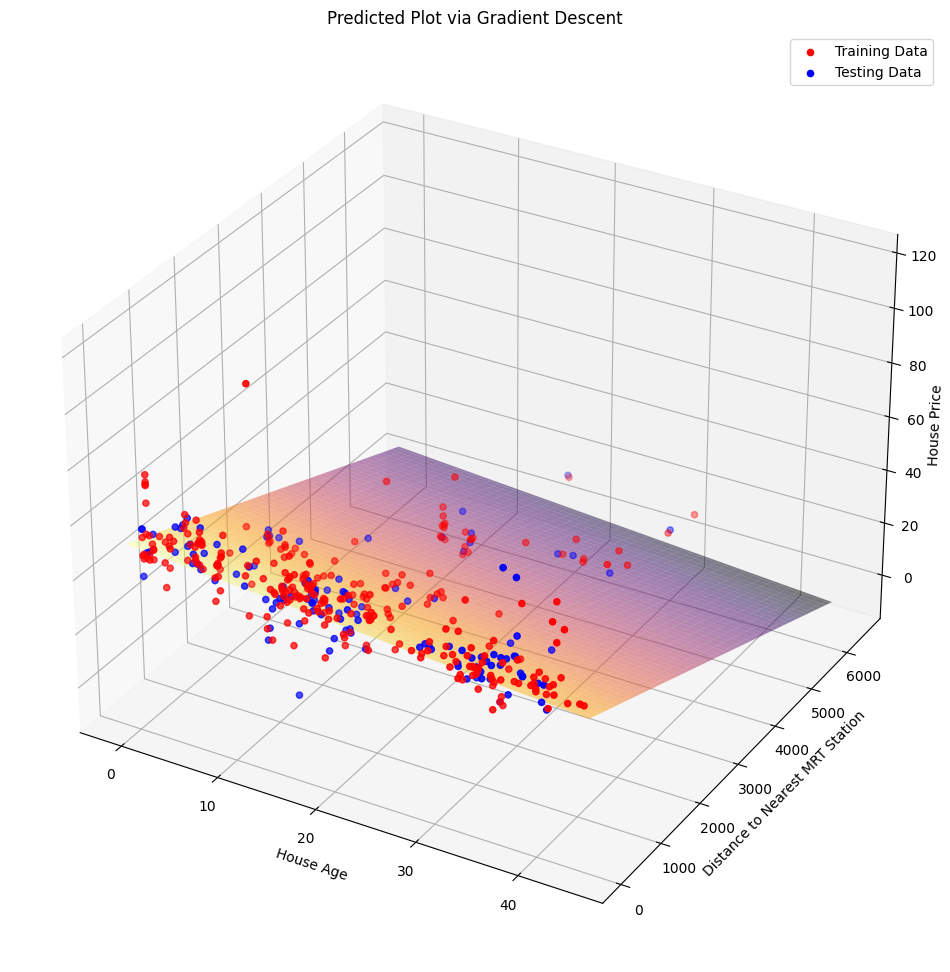

In [ ]:
# Generate data for surface plot
x1 = np.linspace(np.min(X[:,0])-1, np.max(X[:,0])+1, 100)
x2 = np.linspace(np.min(X[:,1])-1, np.max(X[:,1])+1, 100)
X1, X2 = np.meshgrid(x1, x2)
X_grid = np.c_[X1.ravel(), X2.ravel()]  # Flatten meshgrid to a 2D array
X_grid_scaled = scalerX.transform(X_grid)  # Scale the flattened meshgrid


##Or Since we only have two features we can also do this
X1_scaled = X_grid_scaled[:, 0].reshape(X1.shape)  # Reshape back to meshgrid
X2_scaled = X_grid_scaled[:, 1].reshape(X2.shape)
Z = b + w[0] * X1_scaled + w[1] * X2_scaled
surface_plot = scalerY.inverse_transform(Z).reshape(X1.shape)

# Plot the surface
fig = plt.figure(figsize=(12, 15))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X1, X2, surface_plot, alpha=0.5, cmap='inferno')

# Scatter plot of the data points
ax.scatter(X_train[:,0], X_train[:,1], y_train, color='r', label='Training Data')
ax.scatter(X_test[:,0], X_test[:,1], y_test, color='b', label='Testing Data')

# Set labels
ax.set_xlabel('House Age')
ax.set_ylabel('Distance to Nearest MRT Station')
ax.set_zlabel('House Price')
ax.zaxis.labelpad = -0.2
ax.set_title("Predicted Plot via Gradient Descent")
plt.legend()
plt.show()

# Surface Plot via Stochastic Gradient Descent

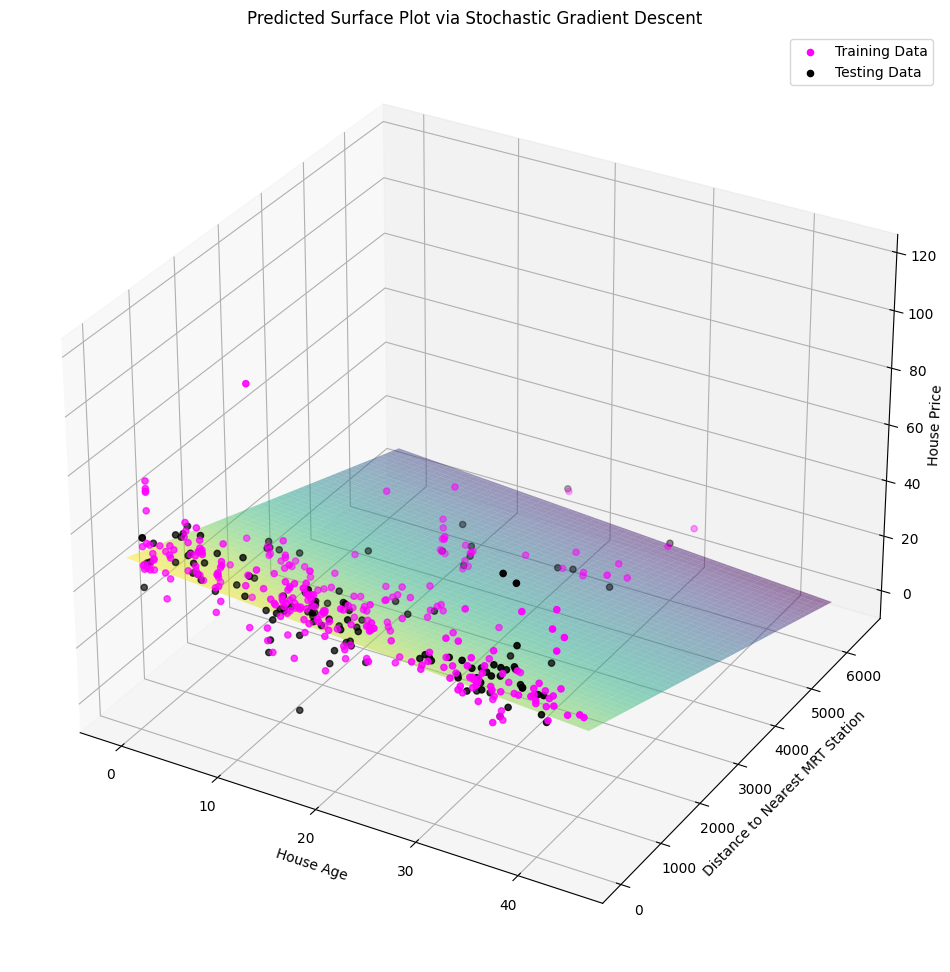

In [ ]:
# Generate data for surface plot
x1 = np.linspace(np.min(X[:,0])-1, np.max(X[:,0])+1, 100)
x2 = np.linspace(np.min(X[:,1])-1, np.max(X[:,1])+1, 100)
X1, X2 = np.meshgrid(x1, x2)
X_grid = np.c_[X1.ravel(), X2.ravel()]  # Flatten meshgrid to a 2D array
X_grid_scaled = scalerX.transform(X_grid)  # Scale the flattened meshgrid


##Or Since we only have two features we can also do this
X1_scaled = X_grid_scaled[:, 0].reshape(X1.shape)  # Reshape back to meshgrid
X2_scaled = X_grid_scaled[:, 1].reshape(X2.shape)
Z = b_sgd + w_sgd[0] * X1_scaled + w_sgd[1] * X2_scaled
surface_plot2 = scalerY.inverse_transform(Z).reshape(X1.shape)

# Plot the surface
fig = plt.figure(figsize=(12, 15))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X1, X2, surface_plot2, alpha=0.5, cmap='viridis')

# Scatter plot of the data points
ax.scatter(X_train[:,0], X_train[:,1], y_train, color='magenta', label='Training Data')
ax.scatter(X_test[:,0], X_test[:,1], y_test, color='k', label='Testing Data')

# Set labels
ax.set_xlabel('House Age')
ax.set_ylabel('Distance to Nearest MRT Station')
ax.set_zlabel('House Price')
ax.zaxis.labelpad = -0.2
ax.set_title("Predicted Surface Plot via Stochastic Gradient Descent")
plt.legend()
plt.show()

# Plot epoch versus loss

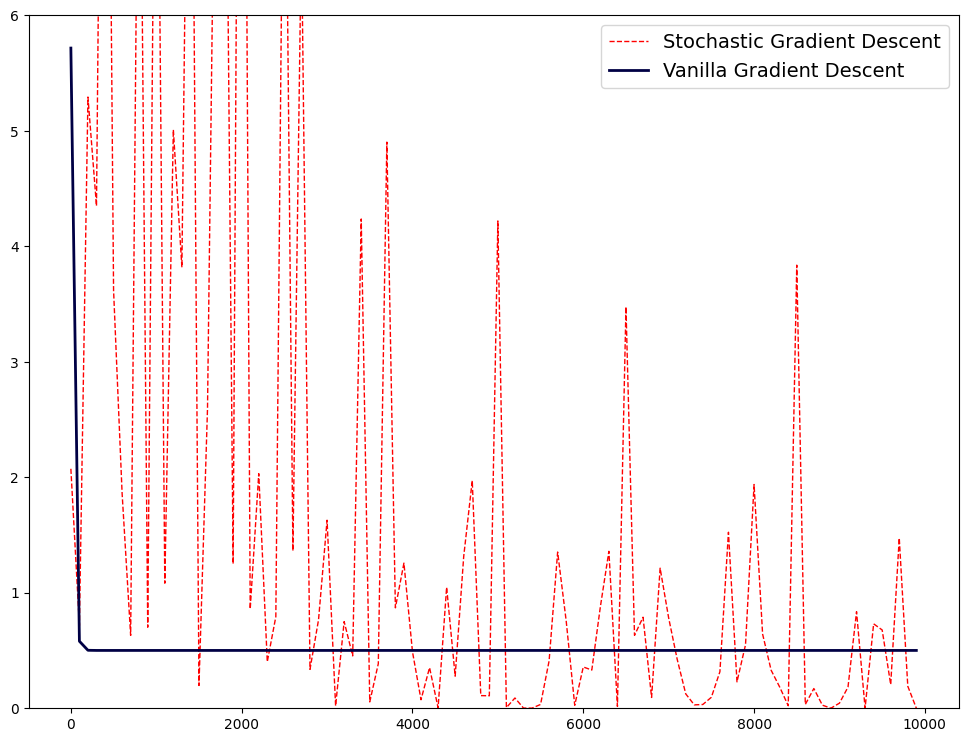

In [ ]:
x_gd = np.array(epoch_list)
y_gd = np.array(cost_list)

x_sgd = np.array(epoch_list_sgd)
y_sgd = np.array(cost_list_sgd).reshape(-1)


plt.subplots(figsize=(12,9))
plt.ylim(0,6)
plt.plot(x_sgd, y_sgd, linestyle="--", linewidth=1.0, color="#FF0000", label="Stochastic Gradient Descent")
plt.plot(x_gd, y_gd,linestyle="-", linewidth=2.0, color="#000044", label="Vanilla Gradient Descent")
plt.legend(loc="upper right", fontsize=14)
plt.show()

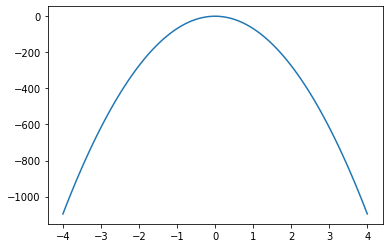

In [ ]:
x = np.linspace(-4,4,100).reshape(-1,1)
a = -68.5
y = a*x**2
# noise = 2*np.random.randn(100)
# ynoise = y + noise

plt.plot(x,y)
plt.show()

In [ ]:
N = len(x)

def cost(w, x, y, N):
    total_cost = 0
    for i in range(N):
        total_cost += (w * x[i]**2 - y[i])**2
    return total_cost / N

def y_pred(w,x):
    return w * (x**2)

def grad(w, x, y, N):
    total_grad = 0
    for i in range(N):
        total_grad += (y_pred(w,x[i]) - y[i]) * (x[i]**2)
    return (2 * total_grad) / N

# Gradient descent loop
w = np.random.randn(x.shape[1])  # Initial guess for w

learning_rate = 0.01
iter = 0
for _ in range(100):
    # Forward pass
    y_pred(w,x)

    # Backpass
    w -= learning_rate * grad(w, x, y, N)
    iter = iter + 1

    #Stopping Criteria
    if np.linalg.norm(grad(w, x, y, N)) <= 1e-4:
        break

print(f"Optimal Weight(s): {w}")
print(f"Number of Iterations: {iter}")
print(f"Norm of the gradient {grad(w,x,y,N)}")

Optimal Weight(s): [-68.50000035]
Number of Iterations: 7
Norm of the gradient [-3.78271264e-05]


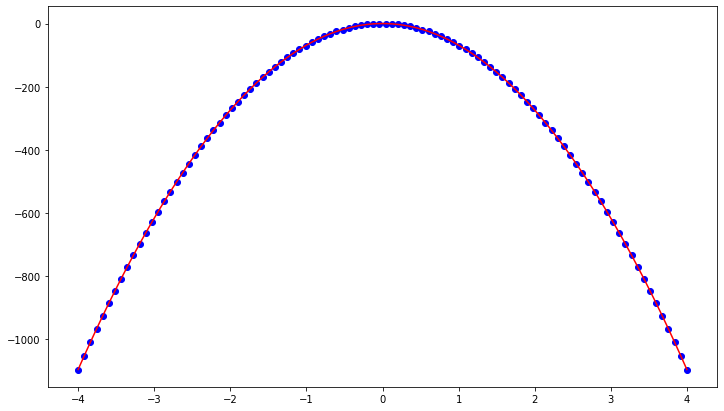

In [ ]:
plt.subplots(figsize=(12,7))
plt.scatter(x,y,color="#0000FF")
plt.plot(x,y_pred(w,x),color="#FF0000")
plt.show()

In [ ]:
# True function: y = sin(x)
def y_true(x,a=1):
    return a*np.sin(x)
#Define the Model
def y_pred(x, a, b, theta):
    return a*np.sin(theta * x) + b*np.cos(theta*x)

#Define Model 2
def y_pred2(x, a, theta):
    return a*np.sin(theta * x)

# Define the loss function (Mean Squared Error)
def fun(x,a,b,theta,N=len(x)):
    sum = 0
    for i in range(N):
        sum += (y_pred(x[i],a,b,theta) - y_true(x[i]))**2
    return sum / N

def fun2(x,a,theta,N=len(x)):
    sum = 0
    for i in range(N):
        sum += (y_pred2(x[i],a,theta) - y_true(x[i]))**2
    return sum / N

def gradient(x,a,b,theta,N=len(x)):
    sum1 = 0; sum2 = 0; sum3 = 0;
    for i in range(N):
        sum1 += (y_pred(x[i],a,b,theta) - y_true(x[i])) * np.sin(theta * x[i])
        sum2 += (y_pred(x[i],a,b,theta) - y_true(x[i])) * np.cos(theta * x[i])
        sum3 += (y_pred(x[i],a,b,theta) - y_true(x[i])) * (a*np.cos(theta*x[i]) - b*np.sin(theta*x[i]))
    grada = (2*sum1) / N; gradb = (2*sum2) / N; gradc = (2*sum3) / N;
    return np.array([grada,gradb,gradc])

def gradient2(x,a,theta,N=len(x)):
    sum1 = 0; sum2 = 0;
    for i in range(N):
        sum1 += (y_pred2(x[i],a,theta) - y_true(x[i])) * np.sin(theta * x[i])
        sum2 += (y_pred2(x[i],a,theta) - y_true(x[i])) * (a*np.cos(theta*x[i]) - b*np.sin(theta*x[i]))
    grada = (2*sum1) / N; gradc = (2*sum2) / N
    return np.array([grada,gradc])

# Generate synthetic data
np.random.seed(0)

x = np.linspace(0, 2*np.pi, 100)
N = len(x)
y = y_true(x)

cost_list = []
# noise = np.random.normal(scale=0.1, size=100)

# Perform gradient descent
learning_rate = 0.1
max_iter = 1000

# Initialize parameters
a = 2
b = 1
theta = 2

# # Gradient descent
iter = 0
for _ in range(max_iter):
    # Update parameters

    a_new = a - learning_rate * gradient(x,a,b,theta,N=len(x))[0]
    b_new = b - learning_rate * gradient(x,a,b,theta,N=len(x))[1]
    theta_new = theta - learning_rate * gradient(x,a,b,theta,N=len(x))[2]

    # a_new = a - learning_rate * gradient2(x,a,theta,N=len(x))[0]
    # theta_new = theta - learning_rate * gradient2(x,a,theta,N=len(x))[1]

    theta = theta_new; a = a_new;
    b = b_new;
    iter += 1
    cost_list.append(fun(x,a,b,theta,N=len(x)))
    # cost_list.append(fun2(x,a,theta,N=len(x)))

# # Print optimized parameters
print("Optimized parameters:")
print(f"a : {a}")
print(f"b : {b}")
print(f"theta : {theta}")
print(f"Maximum Number of Iterations {iter}")


Optimized parameters:
a : -0.00618373085781461
b : -0.00017878164681657186
theta : 1.9907997099484755
Maximum Number of Iterations 1000


0.0


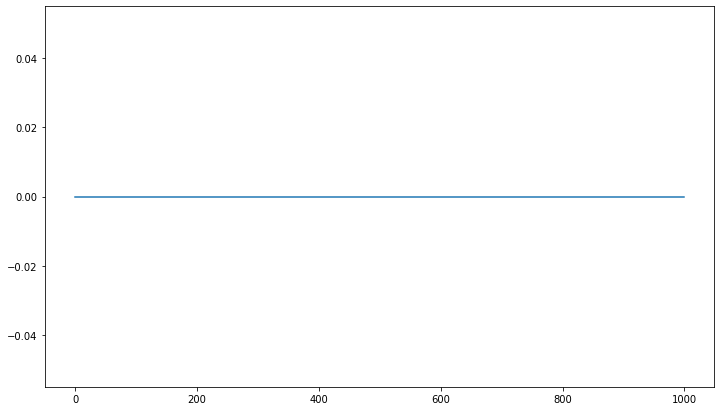

In [ ]:
print(f"{cost_list[-1]}")
plt.subplots(figsize=(12,7))
plt.plot(np.arange(0,len(cost_list)),cost_list)
plt.show()

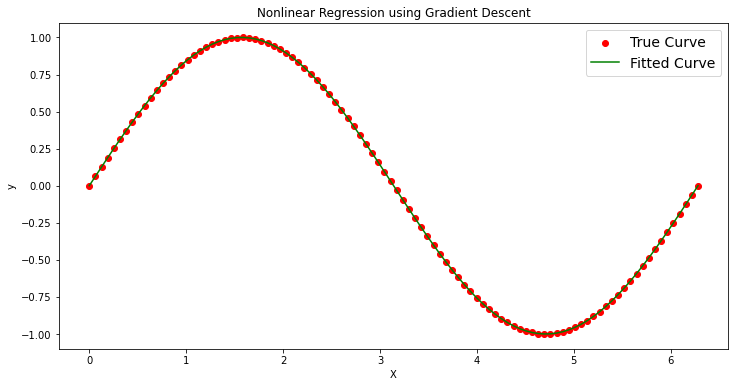

In [ ]:
# Plot true curve and fitted curve
plt.subplots(figsize=(12,6))
plt.scatter(x, y_true(x), color='red', label='True Curve')
plt.plot(x, y_pred(x, a, b, theta), color='green', label='Fitted Curve')
# plt.plot(x, y_pred2(x, 1,1), color='blue', label='Fitted Curve')
plt.legend(fontsize=14)
plt.xlabel('X')
plt.ylabel('y')
plt.title('Nonlinear Regression using Gradient Descent')
plt.show()
